# IUPRED - pLLDT analyses

Modules

In [1]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from Bio import SeqIO

## Read CSVs

In [45]:
df_bfactor = pd.read_csv('./iupred_plddt/Omicron_bfactor.csv')
df_all = pd.read_csv('./iupred_plddt/Omicron_iupred2a_long.csv')

In [3]:
df_bfactor.head()

,pos,pLDDT,variant
0,1.0,54.74,Delta_N481K
1,2.0,60.03,Delta_N481K
2,3.0,67.49,Delta_N481K
3,4.0,82.77,Delta_N481K
4,5.0,87.88,Delta_N481K


<ipython-input-46-b3cf59badf94>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(range(330,531))
<ipython-input-46-b3cf59badf94>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(range(330,531))


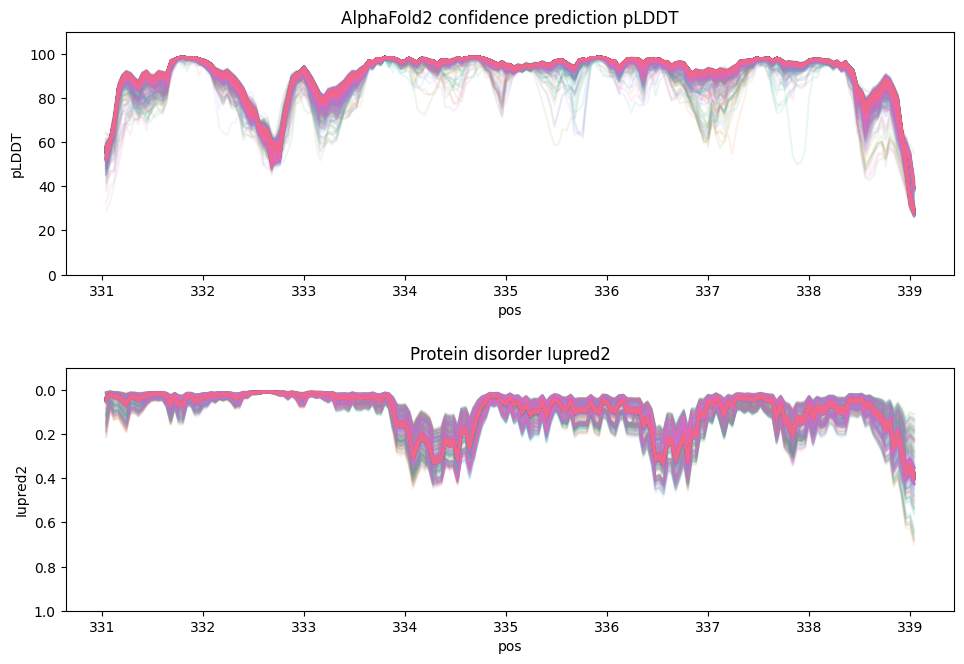

In [46]:
# Join the plots..

f, axes = plt.subplots(2, 1,figsize=(10, 7), dpi=100)

# plt.figure(figsize=(8, 2), dpi=100)
sns.lineplot(data=df_bfactor, x='pos', y='pLDDT', hue='variant', legend = False,ax=axes[0],alpha=0.1)
axes[0].set_ylim([0,110]) #change pos to show real amino acid pos in the RBD...
axes[0].set_xticklabels(range(330,531))
# rename x axis, +331 
axes[0].set_title('AlphaFold2 confidence prediction pLDDT')

# plt.figure(figsize=(8, 2), dpi=100)
sns.lineplot(data=df_all, x='pos', y='Iupred2', hue='variant', legend = False, ax=axes[1],alpha=0.1)
axes[1].set_ylim([-0.1,1])
axes[1].set_xticklabels(range(330,531))
axes[1].invert_yaxis()
axes[1].set_title('Protein disorder Iupred2')

f.tight_layout(pad=2.0)

plt.show()

#add subplot letters to ref in paper.
# save

if bfactor not start with 1

In [7]:
## This may not be needed any more
#df_bfactor['pos'] = df_bfactor['pos'] - 330

Merge

In [3]:
df_bfactor['pos'] = df_bfactor['pos'].astype(int)
df_all['pos'] = df_all['pos'].astype(int)
df_all['Iupred2'] = df_all['Iupred2'].astype(float)

In [8]:
df_merge = pd.merge(df_all, df_bfactor)
print(df_merge.shape)
df_merge.head()
df_merge = df_merge[(df_merge['pos'] < 181) & (df_merge['pos'] > 19)]


(767619, 5)


Text(0, 0.5, 'pLDDT')

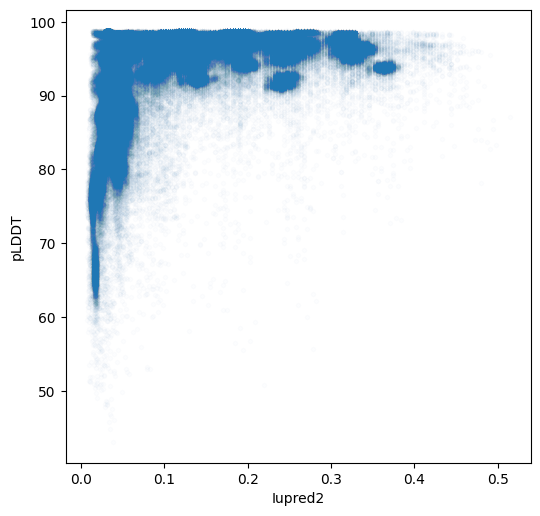

In [10]:
plt.figure(figsize=(6, 6), dpi=100)
idx = (df_merge.pos>20) & (df_merge.pos<180)
#plt.plot(np.tanh(df_merge[idx].Iupred2.values*10), df_merge[idx].pLDDT.values,'.', alpha=0.1)
plt.plot(df_merge[idx].Iupred2.values, df_merge[idx].pLDDT.values,'.', alpha=0.01)
plt.xlabel('Iupred2')
plt.ylabel('pLDDT')

Text(0, 0.5, '1/pLDDT')

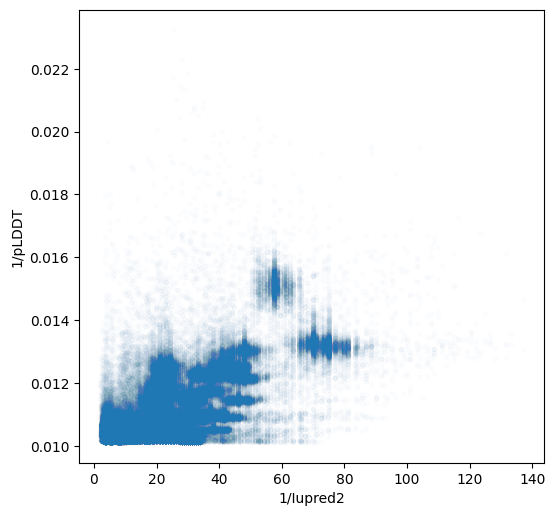

In [11]:
plt.figure(figsize=(6,6), dpi=100)
idx = (df_merge.pos>20) & (df_merge.pos<180)
#plt.plot(np.tanh(df_merge[idx].Iupred2.values*10), df_merge[idx].pLDDT.values,'.', alpha=0.1)
plt.plot(1/(df_merge[idx].Iupred2.values), 1/(df_merge[idx].pLDDT.values),'.', alpha=0.01)
plt.xlabel('1/Iupred2')
plt.ylabel('1/pLDDT')

Text(0, 0.5, '100-pLDDT')

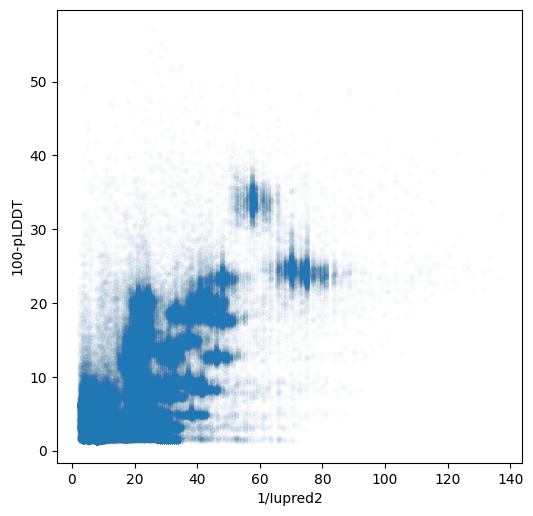

In [9]:
plt.figure(figsize=(6, 6), dpi=100)
idx = (df_merge.pos>20) & (df_merge.pos<180)
#plt.plot(np.tanh(df_merge[idx].Iupred2.values*10), df_merge[idx].pLDDT.values,'.', alpha=0.1)
plt.plot(1/(df_merge[idx].Iupred2.values), (100-df_merge[idx].pLDDT.values),'.', alpha=0.01)
#plt.scatter(1/(df_merge[idx].Iupred2.values), (100-df_merge[idx].pLDDT.values), c=df_merge[idx].pos.values,alpha=0.01, edgecolors=None, linewidth=0)
plt.xlabel('1/Iupred2')
plt.ylabel('100-pLDDT')
#plt.colorbar()

Linear regression

In [19]:
X = df_merge.iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_merge.iloc[:, 4].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

# Transform data
x = 1/X
y = 100 - Y

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x, y)  # perform linear regression
y_pred = linear_regressor.predict(x)  # make predictions

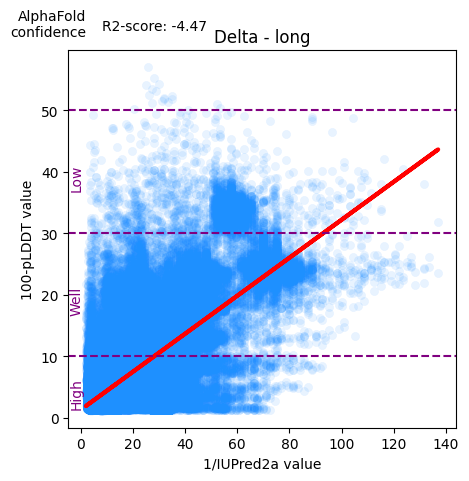

In [34]:
# Plot in the new corrdiante system..

# transofrm data..

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(x, y, edgecolor=None, color='dodgerblue', linewidth=0.2, alpha=0.1)
plt.plot(x, y_pred, color='red', linewidth=3)
plt.title('Delta - long')
# plt.xlim([0,1])
# plt.ylim([0,100])
plt.xlabel('1/IUPred2a value')
plt.ylabel('100-pLDDT value')
plt.axhline(y=100-50, color='purple', linestyle='--')
plt.axhline(y=100-70, color='purple', linestyle='--')
plt.axhline(y=100-90, color='purple', linestyle='--')
plt.text(8, 63, 'R2-score: '+str(round(r2_score(y, x),2)))
plt.text(2, 62, 'AlphaFold\nconfidence', ha='right')
plt.text(0.99, 100-96, 'High', ha='right', va='center',rotation=90, color='purple')
plt.text(0.99, 100-81, 'Well', ha='right', va='center', rotation=90, color='purple')
plt.text(0.99, 100-61, 'Low', ha='right', va='center',rotation=90, color='purple')
# plt.text(0.99, 26, 'Disorder?', ha='right', va='center',rotation=90, color='purple')
# plt.text(0.25, 2, 'Ordered', ha='center', va='center', color='g')
# plt.text(0.75, 2, 'Disordered', ha='center', va='center', color='g')

plt.show()



Plot

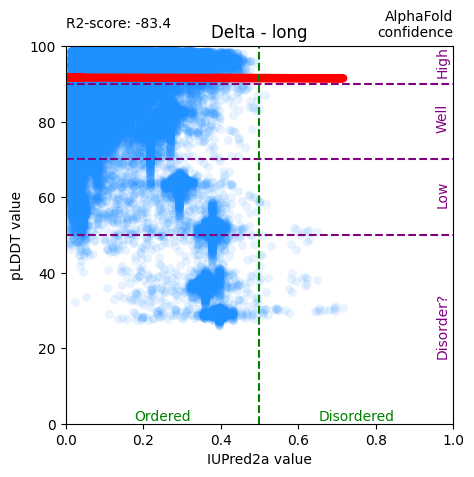

In [14]:
plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(X, Y, edgecolor=None, color='dodgerblue', linewidth=0.2, alpha=0.1)
plt.plot(X, Y_pred, color='red', linewidth=6)
plt.title('Delta - long')
plt.xlim([0,1])
plt.ylim([0,100])
plt.xlabel('IUPred2a value')
plt.ylabel('pLDDT value')
plt.axhline(y=50, color='purple', linestyle='--')
plt.axhline(y=70, color='purple', linestyle='--')
plt.axhline(y=90, color='purple', linestyle='--')
plt.axvline(x=0.50, color='g', linestyle='--')
plt.text(0, 105, 'R2-score: '+str(round(r2_score(Y, X),2)))
plt.text(1, 102.5, 'AlphaFold\nconfidence', ha='right')
plt.text(0.99, 96, 'High', ha='right', va='center',rotation=90, color='purple')
plt.text(0.99, 81, 'Well', ha='right', va='center', rotation=90, color='purple')
plt.text(0.99, 61, 'Low', ha='right', va='center',rotation=90, color='purple')
plt.text(0.99, 26, 'Disorder?', ha='right', va='center',rotation=90, color='purple')
plt.text(0.25, 2, 'Ordered', ha='center', va='center', color='g')
plt.text(0.75, 2, 'Disordered', ha='center', va='center', color='g')

plt.show()

# Split ends

### split after analyses

In [15]:
df_merge = df_merge[(df_merge['pos'] < 181) & (df_merge['pos'] > 19)]

X = df_merge.iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_merge.iloc[:, 4].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

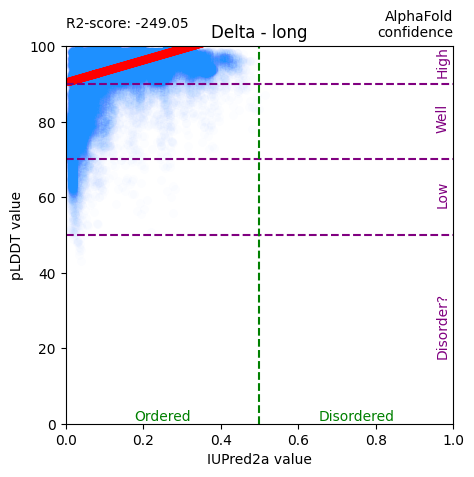

In [16]:
plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(X, Y, edgecolor=None, color='dodgerblue', linewidth=0.2, alpha=0.01)
plt.plot(X, Y_pred, color='red', linewidth=6)
plt.title('Delta - long')
plt.xlim([0,1])
plt.ylim([0,100])
plt.xlabel('IUPred2a value')
plt.ylabel('pLDDT value')
plt.axhline(y=50, color='purple', linestyle='--')
plt.axhline(y=70, color='purple', linestyle='--')
plt.axhline(y=90, color='purple', linestyle='--')
plt.axvline(x=0.50, color='g', linestyle='--')
plt.text(0, 105, 'R2-score: '+str(round(r2_score(Y, X),2)))
plt.text(1, 102.5, 'AlphaFold\nconfidence', ha='right')
plt.text(0.99, 96, 'High', ha='right', va='center',rotation=90, color='purple')
plt.text(0.99, 81, 'Well', ha='right', va='center', rotation=90, color='purple')
plt.text(0.99, 61, 'Low', ha='right', va='center',rotation=90, color='purple')
plt.text(0.99, 26, 'Disorder?', ha='right', va='center',rotation=90, color='purple')
plt.text(0.25, 2, 'Ordered', ha='center', va='center', color='g')
plt.text(0.75, 2, 'Disordered', ha='center', va='center', color='g')

plt.show()

What kind of positions at the ends/cells?

In [17]:
disorder = df_merge[(df_merge['Iupred2'] < 0.5) & ((df_merge['pLDDT'] > 70)   &  (df_merge['pLDDT'] < 90))]
disorder = df_merge[(df_merge['Iupred2'] < 0.5) & (df_merge['pLDDT'] < 50)]
disorder.head()

,pos,res,Iupred2,variant,pLDDT
183767,54,P,0.0364,Delta_K386P,48.91
275411,42,A,0.0380,Delta_F374T,47.50
321842,42,A,0.0287,Delta_F374A,47.76
400232,42,A,0.0349,Delta_Y365P,46.85
449075,42,A,0.0389,Delta_F374R,43.06


array([[<AxesSubplot: title={'center': 'pos'}>]], dtype=object)

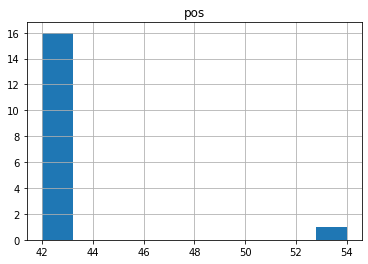

In [18]:
disorder.hist(column='pos', bins=10)

In [19]:
pd.unique(disorder.pos)

array([54, 42, 43])

## split before analyses

Read csv

In [20]:
df_bfactor = pd.read_csv('../dataframes/OmicronBA2_bfactor.csv')
df_all = pd.read_csv('../dataframes/OmicronBA2_iupred2a_long_dice_20_180.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../dataframes/OmicronBA2_bfactor.csv'

In [ ]:
display(df_bfactor.head())
df_all.head()

,pos,pLDDT,variant
0,331,56.82,OmicronBA2_G526H
1,332,60.63,OmicronBA2_G526H
2,333,69.78,OmicronBA2_G526H
3,334,82.58,OmicronBA2_G526H
4,335,87.69,OmicronBA2_G526H


,pos,res,Iupred2,variant
0,1,V,0.0690,OmicronBA2_R457P
1,2,Y,0.0294,OmicronBA2_R457P
2,3,A,0.0235,OmicronBA2_R457P
3,4,W,0.0235,OmicronBA2_R457P
4,5,N,0.0356,OmicronBA2_R457P


if bfactor not start with 1

In [ ]:
df_bfactor['pos'] = df_bfactor['pos'] - 330
df_bfactor.head()

,pos,pLDDT,variant
0,1,56.82,OmicronBA2_G526H
1,2,60.63,OmicronBA2_G526H
2,3,69.78,OmicronBA2_G526H
3,4,82.58,OmicronBA2_G526H
4,5,87.69,OmicronBA2_G526H


iupred values after trimming actually start with 20 (modify!)

In [ ]:
df_all['pos'] = df_all['pos'] + 19
df_all.head()

,pos,res,Iupred2,variant
0,20,V,0.0690,OmicronBA2_R457P
1,21,Y,0.0294,OmicronBA2_R457P
2,22,A,0.0235,OmicronBA2_R457P
3,23,W,0.0235,OmicronBA2_R457P
4,24,N,0.0356,OmicronBA2_R457P


In [ ]:
df_bfactor['pos'] = df_bfactor['pos'].astype(int)
df_all['pos'] = df_all['pos'].astype(int)
df_all['Iupred2'] = df_all['Iupred2'].astype(float)

merge

In [ ]:
df_merge = pd.merge(df_all, df_bfactor)
print(df_merge.shape)
df_merge.head()

(614859, 5)


,pos,res,Iupred2,variant,pLDDT
0,20,V,0.0690,OmicronBA2_R457P,98.57
1,21,Y,0.0294,OmicronBA2_R457P,97.91
2,22,A,0.0235,OmicronBA2_R457P,97.84
3,23,W,0.0235,OmicronBA2_R457P,98.40
4,24,N,0.0356,OmicronBA2_R457P,97.74


lin reg

In [ ]:
X = df_merge.iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_merge.iloc[:, 4].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plot

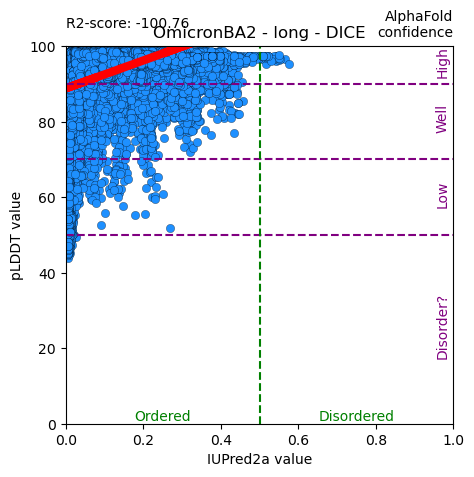

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(X, Y, edgecolor='black', color='dodgerblue', linewidth=0.2)
plt.plot(X, Y_pred, color='red', linewidth=6)
plt.title('OmicronBA2 - long - DICE')
plt.xlim([0,1])
plt.ylim([0,100])
plt.xlabel('IUPred2a value')
plt.ylabel('pLDDT value')
plt.axhline(y=50, color='purple', linestyle='--')
plt.axhline(y=70, color='purple', linestyle='--')
plt.axhline(y=90, color='purple', linestyle='--')
plt.axvline(x=0.50, color='g', linestyle='--')
plt.text(0, 105, 'R2-score: '+str(round(r2_score(Y, X),2)))
plt.text(1, 102.5, 'AlphaFold\nconfidence', ha='right')
plt.text(0.99, 96, 'High', ha='right', va='center',rotation=90, color='purple')
plt.text(0.99, 81, 'Well', ha='right', va='center', rotation=90, color='purple')
plt.text(0.99, 61, 'Low', ha='right', va='center',rotation=90, color='purple')
plt.text(0.99, 26, 'Disorder?', ha='right', va='center',rotation=90, color='purple')
plt.text(0.25, 2, 'Ordered', ha='center', va='center', color='g')
plt.text(0.75, 2, 'Disordered', ha='center', va='center', color='g')

plt.show()

What kind of positions at the ends/cells?

In [ ]:
#disorder = df_merge[(df_merge['Iupred2'] > 0.5) & (df_merge['pLDDT'] < 50)]
#disorder = df_merge[(df_merge['Iupred2'] > 0.5) & (df_merge['pLDDT'] > 90)]
#disorder = df_merge[(df_merge['Iupred2'] < 0.5) & (df_merge['pLDDT'] < 50)]
disorder = df_merge[(df_merge['Iupred2'] > 0.5) & (df_merge['pLDDT'] > 90)]
disorder.head()

,pos,res,Iupred2,variant,pLDDT
23825,178,R,0.5419,OmicronBA2_Y508R,96.53
23826,179,R,0.5139,OmicronBA2_Y508R,96.92
27206,178,Y,0.5665,OmicronBA2_Y501P,96.67
27207,179,R,0.5382,OmicronBA2_Y501P,96.91
51034,178,Y,0.5055,OmicronBA2_V510N,97.50


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce74a04910>]],
      dtype=object)

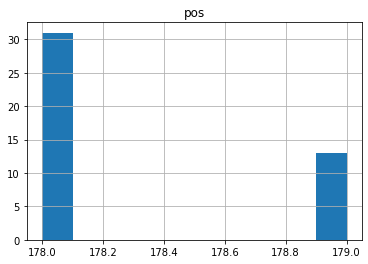

In [ ]:
disorder.hist(column='pos', bins=10)

In [ ]:
pd.unique(disorder.pos)

array([178, 179])

In [ ]:
# mutant? 1- y, 0-n

df_merge["result"] = df_merge.apply(lambda x: 1*((int(x["variant"][-4:-1])-330 == x["pos"]) & (x["variant"][-1] == str(x["res"]))), axis=1)
df_merge.head()

,pos,res,Iupred2,variant,pLDDT,result
0,20,V,0.0690,OmicronBA2_R457P,98.57,0
1,21,Y,0.0294,OmicronBA2_R457P,97.91,0
2,22,A,0.0235,OmicronBA2_R457P,97.84,0
3,23,W,0.0235,OmicronBA2_R457P,98.40,0
4,24,N,0.0356,OmicronBA2_R457P,97.74,0


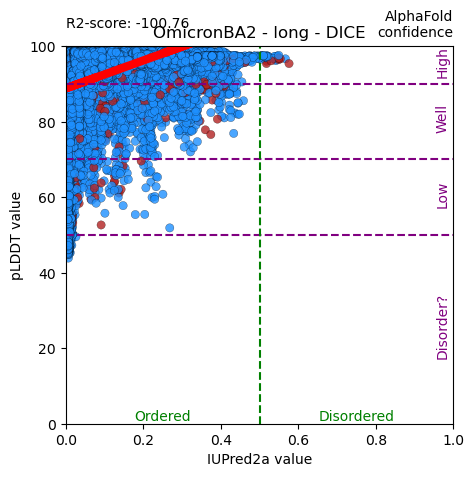

In [ ]:
colors = {0:'dodgerblue', 1:'firebrick'}

plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(df_merge.Iupred2, df_merge.pLDDT, edgecolor='black', c=df_merge.result.map(colors), linewidth=0.2, alpha=0.8)
plt.plot(X, Y_pred, color='red', linewidth=6)
plt.title('OmicronBA2 - long - DICE')
plt.xlim([0,1])
plt.ylim([0,100])
plt.xlabel('IUPred2a value')
plt.ylabel('pLDDT value')
plt.axhline(y=50, color='purple', linestyle='--')
plt.axhline(y=70, color='purple', linestyle='--')
plt.axhline(y=90, color='purple', linestyle='--')
plt.axvline(x=0.50, color='g', linestyle='--')
plt.text(0, 105, 'R2-score: '+str(round(r2_score(Y, X),2)))
plt.text(1, 102.5, 'AlphaFold\nconfidence', ha='right')
plt.text(0.99, 96, 'High', ha='right', va='center',rotation=90, color='purple')
plt.text(0.99, 81, 'Well', ha='right', va='center', rotation=90, color='purple')
plt.text(0.99, 61, 'Low', ha='right', va='center',rotation=90, color='purple')
plt.text(0.99, 26, 'Disorder?', ha='right', va='center',rotation=90, color='purple')
plt.text(0.25, 2, 'Ordered', ha='center', va='center', color='g')
plt.text(0.75, 2, 'Disordered', ha='center', va='center', color='g')

plt.show()